In [2]:
import numpy as np 
import pandas as pd 

import os
from pathlib import Path

import string
import nltk
from nltk.corpus import stopwords

import scipy.io
import scipy.linalg
from scipy.sparse import csr_matrix, vstack, lil_matrix 
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import plotly.express as px
import plotly.figure_factory as ff
#from yellowbrick.text import TSNEVisualizer

In [2]:

import pickle
import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

#Loading raw data
#df = pickle.load(open("data/labeled_data.p",'rb'))
#tweets = df.text

In [7]:
df=pd.read_csv("data/labeled_data.csv",delimiter=",")



In [4]:
df["tweet"][296]


'"@__taradise__: Ya nigs out there still saying y\'all don\'t eat butt?!" WITH A STRAIGHT FACE!'

In [6]:
df

    
    
    
    

,index,post,label
0,0,simply copy and paste the following text into ...,0
1,1,in order to help increase the booklets downloa...,0
2,2,as of march 13th 2014 the booklet had been dow...,0
3,3,click below for a free download of a colorfull...,1
4,4,click on the download 7 42 mb green banner link,0
...,...,...,...
9920,9920,billy that guy would n t leave me alone so i g...,0
9921,9921,wish we at least had a marine le pen to vote f...,0
9922,9922,its like the choices are white genocide candid...,0
9923,9923,why white people used to say that sex was a si...,1


In [5]:
df=pd.read_csv("hate_speech.csv",delimiter=",")

In [6]:
df.describe()

,index,label
count,9925.000000,9925.000000
mean,4962.000000,0.116373
std,2865.245045,0.320688
min,0.000000,0.000000
25%,2481.000000,0.000000
50%,4962.000000,0.000000
75%,7443.000000,0.000000
max,9924.000000,1.000000


In [10]:
df


,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [8]:
del df['Unnamed: 0']

In [1]:
df

NameError: name 'df' is not defined

In [11]:
df.sample(frac=1).reset_index(drop=True)


,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,3,0,1,My bitch bad lookin like a bag of laundry
1,3,0,2,1,1,We trash
2,3,0,3,0,1,Dating you would be like Darnell dating that f...
3,3,0,2,1,1,&#8220;@ForeverrrJadaaa: huge nips scary me&#8...
4,3,0,3,0,1,RT @JuveUnited: Messi REFUSED to be subbed off...
...,...,...,...,...,...,...
24778,3,0,0,3,2,FF has been consistently one of Marvel's worst...
24779,3,0,3,0,1,Don't be a pussy.
24780,3,1,2,0,1,@noPOPULARity_ lmaoo one nigga had that 2nd pi...
24781,3,0,0,3,2,@AutyAut_ I miss you!!! *Eating as we speak* I...


In [24]:
df


,post,label
0,simply copy and paste the following text into ...,0
1,in order to help increase the booklets downloa...,0
2,as of march 13th 2014 the booklet had been dow...,0
3,click below for a free download of a colorfull...,1
4,click on the download 7 42 mb green banner link,0
...,...,...
9920,billy that guy would n t leave me alone so i g...,0
9921,wish we at least had a marine le pen to vote f...,0
9922,its like the choices are white genocide candid...,0
9923,why white people used to say that sex was a si...,1


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import os


In [30]:

text_train, text_test, y_train, y_test = train_test_split(df["tweet"], df["class"], 
    test_size=0.2)
vect = CountVectorizer(ngram_range=(1, 2),stop_words=None,lowercase=True,max_df=0.8, min_df=20)
tfidf = TfidfTransformer()
clf = LinearSVC(C=100.0)
pipe_lr = Pipeline([
    ('vect',vect),
    ('tfidf',tfidf),
    ('clf',clf)
    ])
pipe_lr.fit(text_train, y_train)
print(len(vect.vocabulary_))

print('Test Accuracy: %.3f' % pipe_lr.score(text_test,y_test))
y_pred = pipe_lr.predict(text_test)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred ,average=None))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred ,average=None))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,average=None))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap='Greys', alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.savefig('./confusion_matrix.png', dpi=300)
plt.show()

C:\Users\hedi\.conda\envs\factory619\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



1961
Test Accuracy: 0.869


TypeError: only size-1 arrays can be converted to Python scalars

In [3]:
def get_data():
    data_path = "data/labeled_data.csv"
    df = pd.read_csv(data_path, index_col=0) 
    df = df.sample(frac=1).reset_index(drop=True)  
    return df 

In [4]:
df=get_data()


In [5]:
df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,2,1,1,He a hoe fa that RT @AC_Hussle: Incredible vag...
1,3,0,2,1,1,RT @dnumberbefore_2: I want to take the time t...
2,3,0,3,0,1,Lol @ me next time bitch
3,3,0,3,0,1,"RT @yungtfti: If a bitch says ""eeeeeee"" she a hoe"
4,3,0,1,2,2,You wanna find hoes on here? Just follow the c...
...,...,...,...,...,...,...
24778,3,0,3,0,1,I was at a red light on decatur &amp; lake mea...
24779,3,0,3,0,1,@monetkittrell all this spaceship shit is reta...
24780,3,0,3,0,1,"""@AutoWorId: Hennessey Venom GT &#128584; http..."
24781,3,0,3,0,1,@jshcalderon lmfaoooo I'm tryna see how many h...


In [15]:
def clean_tweet(sent):
    stemmer = nltk.PorterStemmer()        
    tknzr = nltk.RegexpTokenizer(r'[a-zA-Z0-9]+')

    exclp = list(string.punctuation)     
    exclc = [
        "'re", "n't", "'m", "'s", "n't", "'s", 
        "``", "''", "'ve", "'m", "'ll", "'ve", 
        "...", "http", "https"]    
    sw = set(stopwords.words("english") + exclp + exclc)    

    tokens = tknzr.tokenize(sent.lower())
    words = [stemmer.stem(token) for token in tokens if not token in sw]
    return " ".join(words)

In [16]:
def clean_tweet_column(df):
    df["tweet"] = df["tweet"].apply(lambda t: clean_tweet(t))
    return df

In [95]:
# df=clean_tweet_column(df) 


numpy.ndarray

In [106]:
#prosessing data 
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re

stopwords=stopwords = nltk.corpus.stopwords.words("english")

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()


def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    others_regex = 'ð[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    
    
#     regrex='RT :+'
#     text_string = re.sub(regrex, '', text_string)
    
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text = re.sub(hashtag_regex, '', parsed_text)
    parsed_text = re.sub(others_regex, '', parsed_text)

    parsed_text = re.sub('RT', '', parsed_text,1)
#     parsed_text=parsed_text.translate(str.maketrans('', '', string.punctuation))
    
    #parsed_text = parsed_text.code("utf-8", errors='ignore')
    return parsed_text

def tokenize(tweet):
    """Removes punctuation & excess whitespace, sets to lowercase,
    and stems tweets. Returns a list of stemmed tokens."""
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    #tokens = re.split("[^a-zA-Z]*", tweet.lower())
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

def basic_tokenize(tweet):
    """Same as tokenize but without the stemming"""
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()

vectorizer = TfidfVectorizer(
    #vectorizer = sklearn.feature_extraction.text.CountVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords, #We do better when we keep stopwords
    use_idf=True,
    smooth_idf=False,
    norm=None, #Applies l2 norm smoothing
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.501
    )

def Punctuation(string): 
  
    # punctuation marks 
    punctuations = '''±ð!()â¤-[]{};:'"\,ï¸<>./?@#$%^&*_~1234567890'''
  
    # traverse the given string and if any punctuation 
    # marks occur replace it with null 
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 
  
    # Print string without punctuation 
    return(string) 
  



In [17]:
df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
df.tweet=df.tweet.apply(lambda x:preprocess(x))

df.tweet=df.tweet.apply(lambda x:Punctuation(x))
# df.tweet.apply(lambda x:preprocess(x))

In [8]:
df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,2,1,1,He a hoe fa that Incredible vagina is rarely...
1,3,0,2,1,1,I want to take the time tonight to acknowled...
2,3,0,3,0,1,Lol me next time bitch
3,3,0,3,0,1,If a bitch says eeeeeee she a hoe
4,3,0,1,2,2,You wanna find hoes on here Just follow the ch...
...,...,...,...,...,...,...
24778,3,0,3,0,1,I was at a red light on decatur amp lake mead ...
24779,3,0,3,0,1,all this spaceship shit is retarded
24780,3,0,3,0,1,Hennessey Venom GT thats one sexy bitch
24781,3,0,3,0,1,lmfaoooo Im tryna see how many hoes I can lur...


In [23]:
from sklearn.metrics import accuracy_score
#naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
X = df.tweet
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)



nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7937378954163977
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       357
           1       0.79      1.00      0.88      4803
           2       0.92      0.12      0.21      1036

    accuracy                           0.79      6196
   macro avg       0.57      0.37      0.36      6196
weighted avg       0.77      0.79      0.72      6196



C:\Users\hedi\.conda\envs\factory619\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [10]:
df["class"].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [28]:
#linearsvc
#perform well
from sklearn.metrics import precision_score, recall_score ,f1_score
text_train, text_test, y_train, y_test = train_test_split(df["tweet"], df["class"], 
    test_size=0.2)
vect = CountVectorizer(ngram_range=(1, 2),stop_words=None,lowercase=True,max_df=0.8, min_df=20)
tfidf = TfidfTransformer()
clf = LinearSVC(C=100.0)
pipe_lr = Pipeline([
    ('vect',vect),
    ('tfidf',tfidf),
    ('clf',clf)
    ])
pipe_lr.fit(text_train, y_train)
print(len(vect.vocabulary_))

print('Test Accuracy: %.3f' % pipe_lr.score(text_test,y_test))
y_pred = pipe_lr.predict(text_test)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,average='macro'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,average='macro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,average='macro'))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap='Greys', alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.savefig('./confusion_matrix.png', dpi=300)
plt.show()

C:\Users\hedi\.conda\envs\factory619\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



1974
Test Accuracy: 0.870
Precision: 0.706
Recall: 0.654
F1: 0.673
[[  74  201   29]
 [  92 3569  134]
 [  14  176  668]]


NameError: name 'plt' is not defined

In [67]:
#word2vec + xgboost

from gensim.models import KeyedVectors,word2vec

#model=KeyedVectors.load_word2vec_format("C:\Users\hedi\Desktop\factory619 internship\GoogleNews-vectors-negative300.bin", binary=True)

wv = KeyedVectors.load_word2vec_format('C:/Users/hedi/Desktop/factory619 internship/GoogleNews-vectors-negative300.bin', binary=True, limit=500000)
wv.init_sims(replace=True)
from itertools import islice
list(islice(wv.vocab, 13030, 13050))
type(wv)

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

gensim.models.keyedvectors.Word2VecKeyedVectors

In [68]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [72]:
import gensim
import logging
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(dftotal, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['tweet']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['tweet']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)






# def w2v_tokenize_text(text):
#     tokens = []
#     for sent in nltk.sent_tokenize(text, language='english'):
#         for word in nltk.word_tokenize(sent, language='english'):
#             if (len(word)<2):
#                 continue
#             tokens.append(word)
#     return tokens
    
# train, test = train_test_split(df, test_size=0.3, random_state = 42)

# test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['article']), axis=1).values
# train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['article']), axis=1).values

# X_train_word_average = word_averaging_list(wv,train_tokenized)
# X_test_word_average = word_averaging_list(wv,test_tokenized)

C:\Users\hedi\.conda\envs\factory619\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).



In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train["class"])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test["class"]))
print(classification_report(test["class"], y_pred))

C:\Users\hedi\.conda\envs\factory619\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



accuracy 0.8990028262144724
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     12030
           1       0.90      0.81      0.85      6723

    accuracy                           0.90     18753
   macro avg       0.90      0.88      0.89     18753
weighted avg       0.90      0.90      0.90     18753



In [75]:

%%time
from xgboost import XGBClassifier
# # train XGBoost model with default parameters
my_model = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 300)
model = XGBClassifier()
model.fit(X_train_word_average, train["class"] ,verbose=False)
               
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print('accuracy %s' % accuracy_score(y_pred, test["subj or obj"]))
# # and save our model
# my_model.save_model("xgboost_baseline.model")

Wall time: 1min 8s


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [76]:
y_pred = model.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test["class"]))


accuracy 0.898842851810377


[[11336   694]
 [ 1203  5520]]


Text(0, 0, '11336')

Text(1, 0, '694')

Text(0, 1, '1203')

Text(1, 1, '5520')

Text(0.5, 0, 'predicted label')

Text(0, 0.5, 'true label')

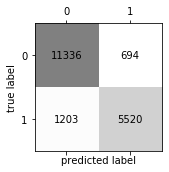

In [77]:

confmat = confusion_matrix(y_true=test["class"], y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap='Greys', alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.savefig('./confusion_matrix.png', dpi=300)
plt.show()

In [78]:
# #LogisticRegression
# from sklearn.linear_model import LogisticRegression

# logreg = Pipeline([('vect', CountVectorizer()),
#                 ('tfidf', TfidfTransformer()),
#                 ('clf', LogisticRegression(n_jobs=1, C=1e5)),
#                ])
# logreg.fit(X_train, y_train)


# y_pred = logreg.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred))

NameError: name 'CountVectorizer' is not defined

In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(text_train, y_train)


y_pred = sgd.predict(text_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7912043574742788
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       303
           1       0.79      0.99      0.88      3816
           2       0.76      0.16      0.27       838

    accuracy                           0.79      4957
   macro avg       0.52      0.39      0.38      4957
weighted avg       0.74      0.79      0.72      4957



C:\Users\hedi\.conda\envs\factory619\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



[[   0  315    8]
 [   0 3798   25]
 [   0  670  141]]


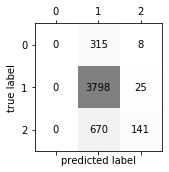

In [24]:

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap='Greys', alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.savefig('./confusion_matrix.png', dpi=300)
plt.show()

In [21]:
#still  not good  result cause of  the  disbalence  of the dataset


df


,count,hate_speech,offensive_language,neither,class,tweet
0,6,0,5,1,1,I hate you sidelines hoes yall got so much c...
1,3,0,3,0,1,smh u got Ebola now RT I stick my foot out t...
2,3,0,0,3,2,Game Preview Houston Astros at New York Yankees
3,3,0,3,0,1,These hoes aint loyal man thats the realest...
4,3,0,3,0,1,Im elated i passed on my creative gene to my d...
...,...,...,...,...,...,...
24778,3,0,3,0,1,like a hoe gettin dick all day and then tonig...
24779,3,0,3,0,1,That pussy cant be that hairy shit gotta stink...
24780,3,0,3,0,1,youre a fucking pussy And no this isnt a jo...
24781,3,0,3,0,1,broke no even though Obama is working on it...


In [35]:
#Lstm first try
df.info()
df["class"].value_counts()
# df.class.value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
count                 24783 non-null int64
hate_speech           24783 non-null int64
offensive_language    24783 non-null int64
neither               24783 non-null int64
class                 24783 non-null int64
tweet                 24783 non-null object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


1    19190
2     4163
0     1430
Name: class, dtype: int64

In [178]:
# The maximum number of words to be used. (most frequent)
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_tot['tweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 42203 unique tokens.


In [37]:
len(word_index)

21780

In [179]:
from  keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df_tot['tweet'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (62507, 250)


In [180]:
Y = pd.get_dummies(df_tot['class']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (62507, 2)


In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(56256, 250) (56256, 2)
(6251, 250) (6251, 2)


In [165]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
# import plotly.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [ ]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(GRU(128,unroll=True)))
#model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 250

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

C:\Users\hedi\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 50630 samples, validate on 5626 samples
Epoch 1/5
39000/50630 [======================>.......] - ETA: 10:15 - loss: 0.3452 - accuracy: 0.8513

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\hedi\.conda\envs\factory619\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-187-fffb0a7c7dc0>", line 13, in <module>
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
  File "C:\Users\hedi\.conda\envs\factory619\lib\site-packages\keras\engine\training.py", line 1239, in fit
    validation_freq=validation_freq)
  File "C:\Users\hedi\.conda\envs\factory619\lib\site-packages\keras\engine\training_arrays.py", line 196, in fit_loop
    outs = fit_function(ins_batch)
  File "C:\Users\hedi\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\backend.py", line 3727, in __call__
    outputs = self._graph_fn(*converted_inputs)
  File "C:\Users\hedi\AppData\Roaming\Python\Python37\site-packages\t

TypeError: can only concatenate str (not "list") to str

In [167]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


3055/3055 [==============================] - 6s 2ms/step
Test set
  Loss: 0.336
  Accuracy: 0.887


In [168]:
accr

[0.3359092356841371, 0.8873977065086365]

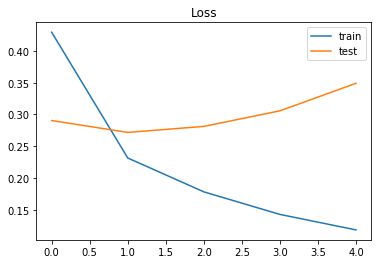

In [169]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


In [77]:
history.history

{'val_loss': [0.33560543173046614,
  0.29792263202873487,
  0.32848247610523473,
  0.3807851864264611,
  0.41451355214479096],
 'val_accuracy': [0.8834603428840637,
  0.8852532505989075,
  0.8843567967414856,
  0.881219208240509,
  0.8789780139923096],
 'loss': [0.46061791738147534,
  0.24916913790808054,
  0.17514939859404796,
  0.12784849899796719,
  0.09863671028833186],
 'accuracy': [0.8409306, 0.9151099, 0.94136405, 0.95625967, 0.966572]}

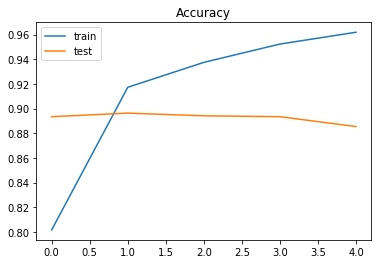

In [170]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [1]:
model.save("insultmodel")

NameError: name 'model' is not defined

In [114]:

confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap='Greys', alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.savefig('./confusion_matrix.png', dpi=300)
plt.show()

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [96]:
#predict if this a hate speech or nor  with the  LSTM model
new_complaint = [' fuck you bitch']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = [0,1,2]
print(pred, labels[np.argmax(pred)])

[[3.0285178e-02 9.6968317e-01 3.1680862e-05]] 1


mix two dataset


In [11]:
df1=pd.read_csv("hate_speech.csv",delimiter=",")
df1

,index,post,label
0,0,simply copy and paste the following text into ...,0
1,1,in order to help increase the booklets downloa...,0
2,2,as of march 13th 2014 the booklet had been dow...,0
3,3,click below for a free download of a colorfull...,1
4,4,click on the download 7 42 mb green banner link,0
...,...,...,...
9920,9920,billy that guy would n t leave me alone so i g...,0
9921,9921,wish we at least had a marine le pen to vote f...,0
9922,9922,its like the choices are white genocide candid...,0
9923,9923,why white people used to say that sex was a si...,1


In [12]:
df2=pd.read_csv("data/train_E6oV3lV.csv",delimiter=",")
df2

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [13]:

del df2['id']
df2=df2.rename(columns={ "label": "class"})
df2["class"].value_counts()

0    29720
1     2242
Name: class, dtype: int64

In [86]:
# def _clean(text):
    
#     #converting to lower case 
#     clean_text = text.lower()
    
#     # removing punctuations
#     clean_text = "". join(p for p in clean_text if p not in punctuations)
    
#     # removing stopwords
#     words = clean_text.split()
#     words =[w for w in words if w not in stopword]
    
#     # lemmatization
#     words = [lem.lemmatize(word, 'v') for word in words]
#     words = [lem.lemmatize(word, 'n') for word in words]
    
#     cleaned_text = " ".join(words)
    
#     return cleaned_text

# # checking if our function works correctly or not
# _clean("this is a Test Text for cleaning")

In [14]:
df2.tweet=df2.tweet.apply(lambda x:preprocess(x))

df2.tweet=df2.tweet.apply(lambda x:Punctuation(x))
# df.tweet.apply(lambda x:preprocess(x))

In [15]:
df2
df2["class"].value_counts()

0    29720
1     2242
Name: class, dtype: int64

In [89]:
df["class"].value_counts()


1    19190
2     4163
0     1430
Name: class, dtype: int64

In [81]:
df_test

,class,count,hate_speech,neither,offensive_language,tweet
0,1,3.0,0.0,0.0,3.0,When I hear a baby cry at a restaurant I can...
1,2,3.0,0.0,3.0,0.0,RT if youd marry Scarlett Johansson
2,0,3.0,2.0,0.0,1.0,Nah its You yo i thought some photoshopped m...
3,1,3.0,0.0,0.0,3.0,When youre grinding with a bitch and shes knoc...
4,1,3.0,0.0,0.0,3.0,Chill bitch we aint in love
...,...,...,...,...,...,...
31957,0,NaN,NaN,NaN,NaN,ate isz that youuuððððððð...
31958,0,NaN,NaN,NaN,NaN,to see nina turner on the airwaves trying to ...
31959,0,NaN,NaN,NaN,NaN,listening to sad songs on a monday morning otw...
31960,1,NaN,NaN,NaN,NaN,vandalised in in condemns act


In [115]:
df_tot=pd.concat([df,df2,df1], sort=True)


In [116]:
df_test

,class,count,hate_speech,neither,offensive_language,tweet
0,1,3.0,0.0,1.0,2.0,He a hoe fa that Incredible vagina is rarely...
1,1,3.0,0.0,1.0,2.0,I want to take the time tonight to acknowled...
2,1,3.0,0.0,0.0,3.0,Lol me next time bitch
3,1,3.0,0.0,0.0,3.0,If a bitch says eeeeeee she a hoe
4,2,3.0,0.0,2.0,1.0,You wanna find hoes on here Just follow the ch...
...,...,...,...,...,...,...
31957,0,NaN,NaN,NaN,NaN,ate isz that youuuððððððð...
31958,0,NaN,NaN,NaN,NaN,to see nina turner on the airwaves trying to ...
31959,0,NaN,NaN,NaN,NaN,listening to sad songs on a monday morning otw...
31960,1,NaN,NaN,NaN,NaN,vandalised in in condemns act


In [55]:
df1["label"].value_counts()

0    8770
1    1155
Name: label, dtype: int64

In [18]:
df1=df1.rename(columns={"post": "tweet", "label": "class"})

In [19]:
 del df1['index']

In [59]:
df1

,tweet,class
0,simply copy and paste the following text into ...,0
1,in order to help increase the booklets downloa...,0
2,as of march 13th 2014 the booklet had been dow...,0
3,click below for a free download of a colorfull...,1
4,click on the download 7 42 mb green banner link,0
...,...,...
9920,billy that guy would n t leave me alone so i g...,0
9921,wish we at least had a marine le pen to vote f...,0
9922,its like the choices are white genocide candid...,0
9923,why white people used to say that sex was a si...,1


In [60]:
df1["class"].value_counts()

0    8770
1    1155
Name: class, dtype: int64

In [118]:
df_test2 = pd.concat([df, df2], sort=True)

In [24]:
df_tot["class"].value_counts()

0    39920
1    22587
2     4163
Name: class, dtype: int64

In [186]:
#linearsvc
#perform well
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import CountVectorizer
text_train, text_test, y_train, y_test = train_test_split(df_tot["tweet"], df_tot["class"], 
    test_size=0.2)
vect = CountVectorizer(ngram_range=(1, 2),stop_words=None,lowercase=True,max_df=0.8, min_df=20)
tfidf = TfidfTransformer()
clf = LinearSVC(C=5000.0)
pipe_lr = Pipeline([
    ('vect',vect),
    ('tfidf',tfidf),
    ('clf',clf)
    ])
pipe_lr.fit(text_train, y_train)
print(len(vect.vocabulary_))

print('Test Accuracy: %.3f' % pipe_lr.score(text_test,y_test))
y_pred = pipe_lr.predict(text_test)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,average='macro'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,average='macro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,average='macro'))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap='Greys', alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.savefig('./confusion_matrix.png', dpi=300)
plt.show()

C:\Users\hedi\.conda\envs\factory619\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.8,
                                 max_features=None, min_df=20,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=5000.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                 

4755
Test Accuracy: 0.870


NameError: name 'precision_score' is not defined

In [149]:

MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_test1['tweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 24914 unique tokens.


In [196]:
dftest

,class,count,hate_speech,neither,offensive_language,tweet
0,1,3.0,0.0,0.0,3.0,When I hear a baby cry at a restaurant I can...
2,0,3.0,2.0,0.0,1.0,Nah its You yo i thought some photoshopped m...
3,1,3.0,0.0,0.0,3.0,When youre grinding with a bitch and shes knoc...
4,1,3.0,0.0,0.0,3.0,Chill bitch we aint in love
5,0,3.0,3.0,0.0,0.0,ESPN keep hiring these dyke bitches and gay Sp...
...,...,...,...,...,...,...
31957,0,NaN,NaN,NaN,NaN,ate isz that youuuððððððð...
31958,0,NaN,NaN,NaN,NaN,to see nina turner on the airwaves trying to ...
31959,0,NaN,NaN,NaN,NaN,listening to sad songs on a monday morning otw...
31960,1,NaN,NaN,NaN,NaN,vandalised in in condemns act


In [157]:
X = tokenizer.texts_to_sequences(df_test1['tweet'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (30545, 250)


In [158]:
Y = pd.get_dummies(df_test1['class']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (30545, 2)


In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(27490, 250) (27490, 2)
(3055, 250) (3055, 2)


In [160]:
model = Sequential()
#model.add(Embedding(input_dim=len(ind_to_vec), output_dim=EMBEDDING_DIM, weights=[ind_to_vec], input_length=MAX_SEQUENCE_LENGTH))
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
#model.add(GRU(128,unroll=True))
#model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
#model.add(layers.SimpleRNN(128,return_sequences=True))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
#model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.2))
#model.add(layers.SimpleRNN(128))
model.add(Dense(32,activation='tanh'))
#model.add(layers.GRU(32, return_sequences=True))
model.add(Dense(2,activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64
history = model.fit(train_x, train_y,epochs=5,batch_size=164,verbose=1,validation_data=(test_x,test_y)) 

ValueError: Error when checking input: expected embedding_24_input to have shape (250,) but got array with shape (20,)

In [85]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

ValueError: Error when checking input: expected embedding_16_input to have shape (20,) but got array with shape (250,)

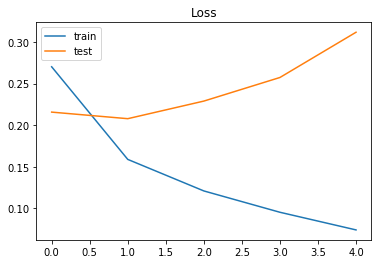

In [174]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


In [102]:

# print('Test Accuracy: %.3f' % model.score(X_test,Y_test))
y_pred = model.predict(X_test)
print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred,average='macro'))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred,average='macro'))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred,average='macro'))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap='Greys', alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.savefig('./confusion_matrix.png', dpi=300)
plt.show()

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

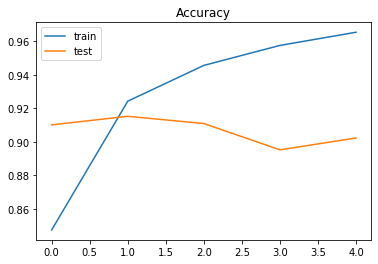

In [99]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [80]:
from sklearn.naive_bayes import MultinomialNB
X = df_row.tweet
y = df_row["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)



nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

accuracy 0.7315892589604702
              precision    recall  f1-score   support

           0       0.83      0.53      0.65      2533
           1       0.71      0.96      0.82      5102
           2       0.99      0.08      0.14      1042

    accuracy                           0.73      8677
   macro avg       0.84      0.52      0.54      8677
weighted avg       0.78      0.73      0.69      8677



In [ ]:
#better result after using 2 dataset 

In [26]:
dftotal=df_tot[df_tot["class"]!=2]

In [27]:
dftotal["class"].value_counts()

0    39920
1    22587
Name: class, dtype: int64

In [28]:
dftotal

,class,count,hate_speech,neither,offensive_language,tweet
0,1,3.0,0.0,1.0,2.0,He a hoe fa that Incredible vagina is rarely...
1,1,3.0,0.0,1.0,2.0,I want to take the time tonight to acknowled...
2,1,3.0,0.0,0.0,3.0,Lol me next time bitch
3,1,3.0,0.0,0.0,3.0,If a bitch says eeeeeee she a hoe
5,1,3.0,0.0,0.0,3.0,This biatch just called me a bitch
...,...,...,...,...,...,...
9920,0,NaN,NaN,NaN,NaN,billy that guy would n t leave me alone so i g...
9921,0,NaN,NaN,NaN,NaN,wish we at least had a marine le pen to vote f...
9922,0,NaN,NaN,NaN,NaN,its like the choices are white genocide candid...
9923,1,NaN,NaN,NaN,NaN,why white people used to say that sex was a si...


In [4]:
from docutils.nodes import header
from keras.layers import GRU
from numpy.core.multiarray import dtype
from pygments.lexer import words
from nltk import *
from nltk.tokenize import *
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.preprocessing import sequence,text
from keras import *
from keras.layers import *
import keras
import os
import string
from nltk.corpus import stopwords
from keras import backend as K
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

Using TensorFlow backend.


In [3]:
MODEL_NAME = "gp"
Wk = word_tokenize
LEM = stem.WordNetLemmatizer()
EMBEDDING_DIM = 50
MAX_SEQUENCE_LENGTH = 20
HIDDEN_LAYER_SIZE = 200
LAYERS = 1

def embedding(data):
    embeddings_index = {}
    f = open(os.path.join('glove.6B.50d.txt'), encoding="utf8")
    for line in f:
        values = str(line).split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    for sent in data:
        for word in sent:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is None:
                embeddings_index[word] = np.random.rand(EMBEDDING_DIM)
#                 print("iiiiiiiiiiiiiiiiiiiiiiii  = ",word, " sss ")
    length = len(embeddings_index)+1
    ind_to_word = []
    word_to_ind = {}
    ind_to_vec = np.random.rand(length,EMBEDDING_DIM)
    ind_to_vec[0] = np.zeros(EMBEDDING_DIM)
    ind = 1
    for word , vec in embeddings_index.items():
        ind_to_word.append(word)
        ind_to_vec[ind] = vec
        word_to_ind[word] = ind
        ind += 1
    return ind_to_vec , word_to_ind , ind_to_word



def seq_data(data,word_to_ind):
    temp = data.apply(lambda row: [word_to_ind[i] for i in row])
    return temp

NameError: name 'word_tokenize' is not defined

In [2]:
def read_data():
#     data = pd.read_csv('train_preprocessed.csv')
    data=df_tot
    x = data['tweet']
    y = data['class']
    temp_unique_label = y.unique()
    unique_label = {}
    for i , label in enumerate(temp_unique_label):
        unique_label[i] = label
#         y= y.replace((label),(i))
    y = keras.utils.to_categorical(y,len(unique_label))
    x = preprocess(x)
    return x ,y,unique_label

In [5]:
def preprocess(data,stem = False):
    #stop = stopwords.words('english')
    stop = list(string.punctuation)
    #stop = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
    print(stop)
    tokenizer = TreebankWordTokenizer()
    p_stemmer = PorterStemmer()
    list_of_X = data.apply(lambda row: row.lower())
    # list_of_X = list_of_X.apply(lambda row: [i for i in (row.split())])
    list_of_X = list_of_X.apply(lambda row: tokenizer.tokenize(row))
    #list_of_X = list_of_X.apply(lambda row: [LEM.lemmatize(i) for i in row])
    #list_of_X = list_of_X.apply(lambda row: [p_stemmer.stem(i) for i in row])
    list_of_X = list_of_X.apply(lambda row: [i for i in row if i not in stop])
    #list_of_X = list_of_X.apply(lambda row: str(row))
    return list_of_X

In [6]:
x , y ,unique_label = read_data()

ind_to_vec,word_to_ind,ind_to_word = embedding(x)
x = seq_data(x , word_to_ind)
x = keras.preprocessing.sequence.pad_sequences(x,MAX_SEQUENCE_LENGTH,padding='pre',truncating='post',value=0)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)


NameError: name 'df_tot' is not defined

In [144]:
# np.counts(train_y,[0.,10])
np.count_nonzero(train_y == [0.,1.])

34388

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 20, 50)            20772900  
_________________________________________________________________
bidirectional_9 (Bidirection (None, 256)               183296    
_________________________________________________________________
dense_32 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 66        
Total params: 20,964,486
Trainable params: 20,964,486
Non-trainable params: 0
_________________________________________________________________


C:\Users\hedi\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 50005 samples, validate on 12502 samples
Epoch 1/5
50005/50005 [==============================] - 149s 3ms/step - loss: 0.3148 - accuracy: 0.8751 - val_loss: 0.2629 - val_accuracy: 0.8985
Epoch 2/5
50005/50005 [==============================] - 144s 3ms/step - loss: 0.2228 - accuracy: 0.9130 - val_loss: 0.2407 - val_accuracy: 0.9075
Epoch 3/5
50005/50005 [==============================] - 147s 3ms/step - loss: 0.1775 - accuracy: 0.9330 - val_loss: 0.2275 - val_accuracy: 0.9109
Epoch 4/5
50005/50005 [==============================] - 147s 3ms/step - loss: 0.1373 - accuracy: 0.9493 - val_loss: 0.2510 - val_accuracy: 0.9095
Epoch 5/5
50005/50005 [==============================] - 146s 3ms/step - loss: 0.1070 - accuracy: 0.9621 - val_loss: 0.2668 - val_accuracy: 0.9054
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

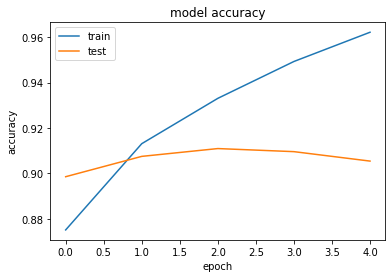

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

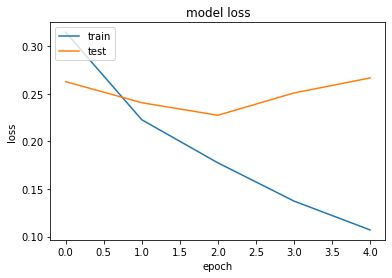

In [148]:
# def KERAS():
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional, Input, concatenate
model = Sequential()
model.add(Embedding(input_dim=len(ind_to_vec), output_dim=EMBEDDING_DIM,
                  weights=[ind_to_vec], input_length=MAX_SEQUENCE_LENGTH))

model.add(Bidirectional(LSTM(128,unroll=True)))
# (GRU(128,unroll=True))
model.add(Dense(32,activation='tanh'))
model.add(Dense(2,activation = 'softmax'))

model.compile(keras.optimizers.adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(train_x, train_y,epochs=5,batch_size=164,verbose=1,validation_data=(test_x,test_y))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [158]:
accr = model.evaluate(test_x,test_y)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

10517/10517 [==============================] - 2s 171us/step
Test set
  Loss: 0.000
  Accuracy: 1.000


In [175]:
model.save("hatespeechmodel9_26.h5")

In [159]:
z=model.predict_classes(test_x)

In [160]:
z

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [161]:
np.count_nonzero(z == 1)

10517

In [164]:
len(z)

10517

In [92]:
df["class"].value_counts()

1    19190
0     1430
Name: class, dtype: int64

In [91]:
df=df[df["class"]!=2]

In [121]:
df_tot["class"].value_counts()

0    39920
1    22587
Name: class, dtype: int64

In [98]:
df2



,class,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for credit i cant use cause they don...
2,0,bihday your majesty
3,0,i love u take with u all the time in urð± ð...
4,0,factsguide society now
...,...,...
31957,0,ate isz that youuuððððððð...
31958,0,to see nina turner on the airwaves trying to ...
31959,0,listening to sad songs on a monday morning otw...
31960,1,vandalised in in condemns act


In [109]:
df2.tweet=df2.tweet.apply(lambda x:preprocess(x))

df2.tweet=df2.tweet.apply(lambda x:Punctuation(x))
# df.tweet.apply(lambda x:preprocess(x))

,class,tweet
0,0,when a father is dysfunctional and is so self...
1,0,thanks for credit i cant use cause they dont ...
2,0,bihday your majesty
3,0,i love u take with u all the time in ur ...
4,0,factsguide society now
...,...,...
31957,0,ate isz that youuu
31958,0,to see nina turner on the airwaves trying to ...
31959,0,listening to sad songs on a monday morning otw...
31960,1,vandalised in in condemns act
